<a href="https://www.kaggle.com/code/megr25/twitter-nlp-feature-engineer-deep-learning?scriptVersionId=113623999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 15px;
          color:white;">
       Twitter Analysis | - Introduction 
    </p>    
</div>
<img src="https://www.downloadsource.es/uploaded/News%20January%202015/Twitter%20GIF/Twitter%20GIF.gif" 
     style="float:right;" 
     alt="Customer Segmentation" width="1200" height="50"/>
     <p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <h3 style="float:left;">Natural Language Process</h3>   
    <p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
   <p>Natural Language Process or  <a href = 'https://www.ibm.com/cloud/learn/natural-language-processing'> NLP,</a> strives to build machines that understand and respond to text or voice data - and respond with text or speech of their own - in much the same way humans do, and "yes" it means computers are able to read and understand. NLP is a branch of computer science, more specifically from artificial Intelligence or AI, that combines computational linguistics - rule based on modeling human language - <b>"in easy words" language grammar</b>, statistical tecniques and Machine Learning Algorithms, all this techniques combined make posible task such as word translation, Sentimental Analysis, span detection, fake new detection, text summarization , and many more , but I know you all know that , therefore <b>let's get our hand dirty and get into the data</b>. &nbsp; </p>
    <p> <b>Disclosure:</b> First , it is important to mention that the data showed and analyzed is public here in <b>Kaggle</b>, however you will find other files that are private and that info was pulled by me, using <b>Selenium</b> , all this information is for educational purpose and should not be used for any other purpose.
    
    
    
<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 15px;
          color:white;">
       What are you going to find in this notebook? | - Index 
    </p>    
</div>

* [1. Importing Libraries and Loading data](#1) import all libraries needed it in this notebook <b> (Pandas ,numpy , Tensorflow, etc) </b>

* [2. Cutomize Fuctions - Classes - Code](#2) All fuctions and sub fuctions used in this notebook Dictionaries, Scrappying and more <b> (Pre_1 , Pre_2) </b>
   
* [3. Data Pulling , Cleaning,Pre-Processing](#3) Get familiar with the Data, Find inconsistencies, Text Processin , Regex and More.
    - [3.1 Cleaning | Spaces](#3.1) Removing Tag Spaces and Spaces
    - [3.2 Cleaning | Expanding Words](#3.2) Expading words such as <b>can't</b> --> can not 
    - [3.3 Cleaning | Mentions - Links](#3.3) Removing <b>#MarvinGarcia #DataScientist</b>
    - [3.4 Cleaning | Removing Alpha-Numerics words](#3.4) Replacing <b>#Waiting 4 a reval8on</b>
    - [3.5 Cleaning | Preffix and Suffix](#3.5) Replacing <b>ly, able , lly , un</b>
    

* [4. Visualization](#4)

    - [4.1 World Map](#4.1) Top 5 Twitters by City Arround the World
    - [4.2 Technical Analysis](#4.2) Spam / No Spam  
    
    
* [5. Machine Learning ](#5) Using <b>Naive Bayes , Support Vector Machine , RandomForest , Passive Agressive </b> for Classification

    - [5.1 First Selection](#5.1) Define the best metrics
    - [5.2 Hyperparameters and Stacking](#5.2) Votting Classifier
    
    
* [6. Deep Learning ](#6) Using Deep Learning architicture such as Feedfoward NN, LSTM, GRU

    - [6.1 Feed Forward + Embedding layer](#6.1) Define the best metrics
    - [6.2 WordVecotr Embedding](#6.2) Votting Classifier
    - [6.3 Checking Spelling](#6.3) Replacing more than 500 words
    - [6.4 Last models and submission](#6.4) Last model and conclusion
    
<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "1"></a>
    <p style="padding: 15px;
          color:white;">
        Python | - Libraries
    </p>    
</div>


In [1]:
from IPython.display import display_html
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
from nltk.corpus  import stopwords
from itertools import chain,cycle
from collections  import Counter
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import warnings
import nltk
  

import folium 
import string
import re

pd.set_option('max_colwidth', 200)
warnings.filterwarnings("ignore")

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "2"></a>
    <p style="padding: 15px;
          color:white;">
        Fuctions | 
    </p>    
</div>


<p> As mentioned above in here you will find all <b>fuctions</b> that I used in this noteook, but before I would like to let you know what I was doing and how I tackled this dataset</p>
<p> After searching for ideas in Kaggle and many other websites, I realized that most of those notebook were focused on <b>splitting the data, train , test and no more </b>then i dediced I was going to do it differently , I read thousand of those twitters and find so many <b>grammar mistakes, #mentions @people</b> and so many other things, then I decided to use regex to find those inconsistencies, and replace them , this took around 5 hours to make sure that most of them were fixed, however if you find <b>a better way</b> please let us know.</p>

In [2]:
# ---------- > Show two or more Dataset together

def display_side_by_side(*args): 
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def last_replace (word):
    return ''.join(letter for letter in word if letter != "'")
    
# ---------- > First preprocessing to remove all thos weird Symbols and more 
def Prepro_1(text): 
    Ssymbols = ["\x89","\x9d"]    
    ''' Lower Replace #@mentions with Mention to save that pattern'''
    x = re.sub(r'\S*(\w+)(_)(\w+)\S*',"MENTION",text) #Mention
    x = re.sub(r'(https?://[^\s]+)'," LINK ",x) #Link
    x = re.sub(r'(?<![@\w])@(\w{1,25})'," MENTION ",x) #Mention
    x = re.sub(r"#(\w+)\S"," MENTION ",x) #MENTION
    x = re.sub(r"[âãåçèêìïñòó÷ûüª©¨¤«£¢¬`\...¡!¼#\$%&\()\*\+,-./:;<=>?@\[\]^_`{|}~,]+"," ", x)
    x = re.sub(r"'(?!s)","", x)
    x = re.sub(r"\\n|\\n\\"," " ,x) # Valdiate those spaces /n that python was not able to decode
    x = x.lower() # MAKE IT INTO LOWER CASE 
    x = re.sub(str(Ssymbols)," ",x)
    return x.lower()
# ----------- > Used to expand contractions such has I'm to I am
def cont_to_exp(x, list_): #Used to expand contractions such has I'm to I am 
    x = str(x).lower()
    if type(x) is str:
        for key in list_:
            value = list_[key]
            x = x.replace(key,value)
        return x
    else :
        return x
# ---------- > used to Replace 
def replacing_(text, args_dict):
    for key in args_dict.keys():
        text = text.replace(key, str(args_dict[key]))
    return text

# > --------------------- Scrapping ------------------------- <

def Scrpping (url , city, google_exe):
    '''import selenium 
    from selenium.webdriver import Chrome,ChromeOptions, 
    from selenium.webdriver.support.ui import WebDriverWait'''
    
    Google_exe = google_exe
    url = url 
    
    options = webdriver.ChromeOptions()
    brw = webdriver.Chrome(options=options, executable_path=Google_exe)
    
    #Xpath_selector 
    search_box = "//input[@class='address']"
    find_button = "//input[@class='big_button']"
    checking = "//div[@id='display_panel']//div[@id='sel_loc']//select"
    Latitute_ = "//div[@id='display_panel']//div[@id='map_coords']//span[@id='lat_dec']//span[@class='value']"
    Longitude_ = "//div[@id='display_panel']//div[@id='map_coords']//span[@id='lon_dec']//span[@class='value']"
    
    coordinate = {}

    for city in cities:
        if city not in ['everywhere','earth','worldwide']:
            try:
                search_box = "//input[@class='address']"
                find_button = "//input[@class='big_button']"
                checking = "//div[@id='display_panel']//div[@id='sel_loc']//select"
                Latitute_ = "//div[@id='display_panel']//div[@id='map_coords']//span[@id='lat_dec']//span[@class='value']"
                Longitude_ = "//div[@id='display_panel']//div[@id='map_coords']//span[@id='lon_dec']//span[@class='value']"

                # -----> Clean and Search City
                brw.find_element_by_xpath(search_box).clear()
                time.sleep(1)

                brw.find_element_by_xpath(search_box).send_keys(city.capitalize())
                brw.find_element_by_xpath(find_button).click()

                # -----> Waiting 
                WebDriverWait(brw, 60).until(EC.presence_of_element_located((By.XPATH,checking))).click()

                #Get Info 
                Lat = brw.find_element_by_xpath(Latitute_).text
                Lon = brw.find_element_by_xpath(Longitude_).text

                #Inserting 
                coordinate[city] = [Lat,Lon]
            except:
                print('Error in', city)
                coordinate[city] = [0,0]
        else:
            print('City name', city)
            coordinate[city] = [0,0]

# -------------------- Dictionaries ----------------------------------

# Dictinaries 
contractions = {"'re":'are',"u're":"you are","they've":"they have","i'm":"i am","you've":"you have","we've":"we have","wouldn't":'would not',"couldn't":'could not',"isn't":'is not',"don't":'do not',"haven't":'have not',"hasn't":'has not',"doesn't":'does not',"I've":'i have',"aren't":'are not',"shouldn't":'should not',"can't":'can not',"hadn't":'had not',"wasn't":'was not',"won't":'will not',"there's":'there is',"didn't":'did not',"weren't":'were not',"that's":'that is',"he's":'he is',"she's":'she is',"they're": 'they are',"cya":'see you',"we're":'we are',"it's":'it is',"you're":"you are","i've":'i have',"wtf":'what the fuck',"must've":'must have',"should've":"should have","would've":"would have","could've":"could have","how're":'how are',"it's":'it is',"what's":'what is',"\\":"","\\n":"","cuz":"because"}
special_words = {"ayhhhdjjfjrjjrdjjeks":'','weallheartonedirection':'we all heart one direction','awesomeeeeeeee':'awesome','prettyboyshyflizzy':'pretty boy shy flizzy','championsblackfoot':'champions black foot','mothernaturenetwork':'mother nature network','referencereference':'reference','jaylenejoybeligan':'jay lene joy beligan',"measuresmention',":'measure mention','postapocalypticflimflam':'post apocalyptic flim flam',"antiochhickoryhollowmention',":'antioch hickory hollow mention','indianperpetrated':'indian perpetrated', "'tiffanyfrizzell":'tiffany frizzell',"'robot_rainstorm": 'robot rainstorm','hawaiianpaddlesports':'hawaiian paddle sports',"ayhhhhhdjjfjrjjrdjjeks',":'','siteinvestigating':'site investigating',"'hamptonroadsfor":'hampton roads for','undergroundbestsellers':'underground best sellers',"zimpapersviews',":'zim papers views',"'mentionmentionmentionmentionmention":'mention',"kwaaaaamention',":'mention',"abbruchsimulator',":'abbruch simulator','romanatwoodvlogs':'roman at wood blogs','sidjsjdjekdjskdjd':'','electrocutedboiling':'electrocuted boiling','lavenderpoetrycafe':'lavender poetry cafe','deejayempiresound':'dee jay empire sound','lulgzimbestpicts':'lulzim best picts','conditionsprivation':'conditions privation',"'neil_eastwood77":'neil eastwood 77','derailed_benchmark':'derailed benchmark'}
numer_words = {'sherfield72':'mention','rs40000cr':'mention','air1bullet':'air bullet','960kzim':'mention',"'revel8ion":'revelation',"'news786":'news 786',"'mumbai24x7":'mention','17months':'17 months','ny1burst':'new york burst','tkyonly1fmk':'mention','nikoniko12022':'mention','hamosh84':'mention','ibliz140':'mention','bkb066gp':'mention','tksgs0810':'mention','mhtw4fnet':'mention',"'psalm34":'mention',"76mins":'76 minutes',"oliviamiles01":'mention','friend50':'friend 50', "'master0fsloths":'master of sloths',"'s3xleak":'sex leak','push2left':'push to left',"'411naija":'mention','wsvr1686b':'mention','911bombing':'911 bombing',"fuckjf9jjzs',":'mention','b4federal':'mention','7amdollela':'7 am dollela','3million': '3 million','vaping101':'mention',"'matako_3":'mention','150bilno':'mention',"'neil_eastwood77":'mention','hirochii0':'mention',"20mins',":'20 mins',"'chickmt123":'mention','drayesha4':'mention','death2usa':'death to usa',"2gether',":'together','time2015':'time 2015',"'nflweek1picks":'mention','martinmj22':'mention',"'lizzie363":'mention','russaky89':'mention','friend59':'mention',"you5jbwgge',":'mention'}
word_numbers = {'06jst':'', '0npzp':'', '10x':'', '12jst':'', '12news':'', '12v':'', '18jst':'', '1x1':'', '24v':'', '325ci':'', '3x':'', '3x5':'', '429cj':'', '43c':'', '4x4':'', '53inch':'', '6c':'', '712c':'', '_':'', '__':'', '_ah':'', '_deo':'', '_keits':'', '_that':'', '_turns':'',"',":"","sherfield72":"mention","pemantaujkt48":"mention","bracelet10mm":"mention", "'chickmt123":"mention","'tarmineta3":"mention","you5jbwgge',":'mention',"'mumbai24x7":'mention','5sosglobalsquad':'mention','dylanmcclure55':'mention','tanstaafl23':'','footballfreestyle24':'football free style 24',"40hourfamine":"40 hour famine","15000270364',":'number','dylanmcclure55':'mention ',"'master0fsloths":'master of sloths','insurers163':'insurers 163',"15000270653',":'number', 'zonewolf123':'mention',  "'tkyonly1fmk":'mention', "sherfield72'":'mention ', "8437150124',":'number', '40hourfamine':'40 hour famine','watchmanis216':'mention','tarmineta3':'mention',"'neil_eastwood77":'mention',"oliviamiles01',":'mention','hyider_ghost2':'mention ','rabidmonkeys1':'mention ','since1970the':'since 1970 the', "'nflweek1picks":'mention','then0mads0ul':'mention',"fuckjf9jjzs',":'','janenelson097':'mention','087809233445':'0','onlinemh370':'mention', '2slow2report':'to slow to report',"'nikoniko12022":'mention', 'shawie17shawie':'mention'}
repetead_vowels = {"soooo":"so","baaaack":"back","aaaaaaallll":"all","sparxxx":"mention","oooh":"oh","lmfaooo":"laughing my fat ass off","fuckkkkkk":"fuck","vuuuuu":"vu","mxaaaa":"mention","caaaaaall":"call","goooooooaaaaaal":"goal",'shoook':'shook','maaaaan':'man','sooooooo':'soon','blaaaaaaa':'bla','youuu':'you','yeeessss':'yes','noooo':'no','totoo':'totoo',"ooohshit":'oh shit','nooo':'no','wompppp':'womp','maddddd':'mad',"'thankkk":"thank","plsss":"please",'ohhhh':'oh',"'xoxoxxxooo":'hugs and kisses',"'damnnnn":"damn","'damnnnn":"damn","ooo":"oo","oooo":"oo","ooooo":"oo","ssssss":"ss","ssss":"ss","yyyy":'y',"yyyy":'y',"lll":" ll ","eee":"ee","wwwww":"w","aaa":"a","nnn":"n","rrr":"r","aaaaaa":"a","gggg":"g","wwww":"w","www":"w","mmmm":"m","iiii":"i","iii":"i","sss":'s',"yyy":"y","uuu":"u","eee":'e','hhh':'h',"ddd":"d","zzzz',":"sleep","xxx',":"","mhmmm":"hmm","hmmm":'hmm'}


# Tokenazation 
def Pre_toke (corpus):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    #Removing Stop Words
    NEC = [word for word in corpus.split() if word.lower() not in stopwords.words('english')]
    
    # Converting into Indefinitive tense
    NEC = ' '.join([lemmatizer.lemmatize(word, 'v') for word in NEC])
    NEC = NEC.split()
    return NEC

def word_replace (sentences,dictionary):
    new_sentence = []
    for words in sentences.lower().split():
        if words in dictionary.keys():
            new_word= dictionary[words]
            new_sentence.append(str(new_word))
        else:
            new_sentence.append(words)
    return ' '.join(str(w) for w in new_sentence)

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "3"></a>
    <p style="padding: 15px;
          color:white;">
        Data | Data Pulling , Cleaning,Pre-Processing and visualization
    </p>    
</div>

<p><b>Showing both data set -> </b> notice that these rows are selected according to Len = 90, for visual representation. In here I am just trying to show you the real data set and all the noise <b>Links Mentions Comments etc</b></p>
<p>From this point and foward I will be showing <b>the Before and After</b> Processing at each stage. <b>Note</b> This is just a small sample out of the totals row chosen on their len, in the next stage you will find details about how I removed all those comments by using <b>Regex</b> a very useful library. So let's get started</p>
<p> The challenge in NLP <b>in my humble opinion</b> it is the cleaning part, look <b> a model will be always as good as the inputs are </b>, So what are we gonna do with so many mentions, links, etc, other users will remove them and ignore them but I will keep them and give them a special word so if I use <b>Naive Bayes</b> to count the words it will have more chances to classify a spam because the numbers of <b>LINK</b> in a row.</p>

In [3]:
# ----> Define Path
train_path = '../input/nlp-getting-started/train.csv'
test_path  = '../input/nlp-getting-started/test.csv'

# ----> Loading
train_, test_ = pd.read_csv(train_path),pd.read_csv(test_path)

# ----> customizing for Visualizations
columns = ['text']
train_['Length'] = train_['text'].apply(lambda x: len(x))
test_['Length'] = test_['text'].apply(lambda x: len(x))


# Samples 
xprows = train_[(train_['text'].str.contains("n't"))&(train_['Length'] <=60)].index[:10]
mrows = train_[(train_['text'].str.contains("@|#"))&(train_['Length'] <=60)].index[:10]
anrow = train_[(train_['text'].str.contains(r'(\w{1}\d{1}|\d{1}\w{1})', regex=True))&(train_['Length']<=60)].tail(10).index
lyrow = train_[(train_['text'].str.contains(r'ly>|lly$|<un|ry$|ble$|ing$|ed$|tion$|tional$', regex=True))&(train_['Length']<=60)].head(5).index

tsrows = test_[test_['Length']==60].head(10).index[:5]
trows = train_[train_['Length']==60].head(10).index[:5]

#Pandas Styles Format 
titles = {'selector': 'caption','props': [('color', '#1DA1F2'),('font-size', '13px')]}
train_set = train_.loc[trows , columns].head(10).style.set_caption('Training Set').set_table_styles([titles]).hide_index()
test_set =test_.loc[tsrows,columns].head(10).style.set_caption('Testing Set').set_table_styles([titles]).hide_index()

display_side_by_side(train_set,test_set)

text
So i guess no one actually wants any free Aftershock TC.....
smoke good fuck eat drink drive nice car wear all green mink
I BET YOU DIDNT KNOW I KICK BOX TOO! https://t.co/rBrw8pWiPJ
@Im2aD I was going to tell him but you were body bagging him
Whimsy as it pertains to mass casualties. Always impressive.
text
@jackienatalydlt I do.... I only get the iced annihilation??
Patent Pending Stream 'Armageddon' EP http://t.co/BOuaJqi3Lf
Omg i need to go like yesterday ???? https://t.co/3oP6G7ovzO
@TokyoDotCom I didn't either till it blew up my mentions lol


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:100%;
       font-family:Nexa;
       letter-spacing:0.5px">
     <a id = "3.1"></a>
    <p style="padding: 15px;
          color:white;">
        Cleaning | Spaces  
    </p>    
</div>


#### ***As you can see (in Training Set, Testing Set)*** 
<p>we have so many #Metions and @Mentions, I dont show them in here but the data set have so many <b>***\\n***</b> or <b>***\\\n***</b> spaces or tab space, you can check it by removing the '#' in corpus code, and you will see them.The Code below take all those spaces and replace them with "SPACE", I am using <b>Regex</b> to find those spaces, then we use lambda and pandas to repalce them</p> 
<p>The following are two samples extracted form the train set : "check the spaces denoted with <b>"\n"</b></p> 

- **SAMPLES 1** : "on the outside you're ablaze and alive***\n***but you're dead inside."
- **SAMPLES 2** : "Progressive greetings!***\\n\n***\In about a month students would have set their pens ablaze in The Torch Publications'..

In [4]:
#Remove it to show the sentence "on the outside you're ablaze and alive\nbut you're dead inside"
corpus_ = [row for row in train_.text][41] 

# ----------- > Removing Spaces 
train_['text_'] = train_['text'].apply(lambda x: re.sub(r"\\|\n|\\\n|\r|\t"," " ,x)) ##Removing 
test_['text_'] = test_['text'].apply(lambda x: re.sub(r"\\|\n|\\\n\\|\r|\t"," " ,x)) ##Removing 
corpus = [row for row in train_.text_]
print(f"Here the example where we can see 'tab-space' in the sentence\n-----------------> ***{corpus_}***")
print(f"Here the example after removing 'tab-space'\n-----------------> ***{corpus[41]}***")

Here the example where we can see 'tab-space' in the sentence
-----------------> ***on the outside you're ablaze and alive
but you're dead inside***
Here the example after removing 'tab-space'
-----------------> ***on the outside you're ablaze and alive but you're dead inside***


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:100%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <a id = "3.2"></a>
    <p style="padding: 15px;
          color:white;">
        Cleaning | Expanding Words  
    </p>    
</div>

#### ***The second step*** is to find all those words that ends in ***'t*** or ***'ve*** such as **can't**, **shouldn't** , ***should've***
<p> After removing spaces,tab and tab-spaces , I had to expand all contracted words -> <b>I haven't done it - I have not done it</b> and many mores. The reason why it is because if I used (Naive Bayes as the title show) this algorithm will count the numbers of words in the corpus to calculate the probabilities Spam/No spam , another reason is the Word embedding, I can reduce the vector space because I will have only 2 world -> <b>1)have  2)not</b> instead of three vectors <b>1)have  2)not  3)haven't.</b> </p>
<p>The code below shows how we can do it, if you are familiar with Regex you will undersstand that I might have some error in the searching word. <b>Note:</b> The dictionary showing all those words are in the section <b>Fuctions</b></p>

- Use regex ***r"t$|n't$|'re$|'m$|'s>'|'ve"*** to find those words.
- Keep them in a list and then check each of them as showed below
- Uncomment the code above to see the results or just see the dictionary ***'contraction'***

In [5]:
# ------- > Expanda words to avoid losing "'"  in words such as Don't or didn't
ex_contractions= []
for word in (set(str(corpus).lower().split())):
    if bool(re.search(r"'t$|n't$|'re$|'m$|'s>'|'ve",word)):
        ex_contractions.append(word)
        
# ------- >  Expanding
train_['text_'] = train_.text_.apply(lambda x: cont_to_exp(x,contractions))
test_['text_'] = test_.text_.apply(lambda x: cont_to_exp(x,contractions))

# --------> Samples Xprows = Expanding Rows
before = train_.loc[xprows,['text']].style.set_caption('Before Expanding').set_table_styles([titles]).hide_index()
after =train_.loc[xprows,['text_']].style.set_caption('After Expanding').set_table_styles([titles]).hide_index()

display_side_by_side(before,after)

text
No way...I can't eat that shit
Attack on Titan game on PS Vita yay! Can't wait for 2016
@burberryant bleeding on the brain don't know the cause
My mic and controllers aren't working one second
If it wasn't for the Blood! ????
Ain't no hoe in my blood
Ain't no bags in the trunk it's a body
I can't believe @myfriendmina photo bombed a screenshot
@Wild_Lionx3 so others don't get burned
Don't get burned twice by the same flame.


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:100%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <a id = "3.3"></a>
    <p style="padding: 15px;
          color:white;">
        Cleaning | Mentions - Links  
    </p>    
</div>

#### ***Removing -> #Mentionds -> @Mentions -> https://.com -> Symbols and more.*** 

<p> <b>What is next ?</b>, The next step is to remove all those <b>'#Metions', '@Comments' , 'https:www.whatever.com', etc</b>, I did not drop/eliminate those string instead I replaced them by "MENTION" and "LINK" because as you might guess spam message or news have lot of links and few mentions or just think of each possible cobination,<p/>
<p> One more time the code below show how I did it. <b> Note: </b> go to <b>Fuction</b> and find ***<b>Prepro_1</b>***. </p>

- Replace those #mentions @mentions or www.whateverlink.com with the word MENTION or LINK 
- If we just strip the those #mentions we will lose lot of information and patterns for example the ML could learn that if the sentences have many #mentions it could be Fake
- In here I used the Fuction PrePro_1 it can remove ***emtoics***, ***links***, ***mentions***

In [6]:
# Remove @/# Mentions, special characters, Links, Symbols
train_['text_'] = train_.text_.apply(lambda x: Prepro_1(x))
test_['text_'] = test_.text_.apply(lambda x: Prepro_1(x))

before = train_.loc[mrows,['text']].style.set_caption('Before Removing #').set_table_styles([titles]).hide_index()
after =train_.loc[mrows,['text_']].style.set_caption('After Removing #').set_table_styles([titles]).hide_index()

display_side_by_side(before,after)

text
#Flood in Bago Myanmar #We arrived Bago
Damage to school bus on 80 in multi car crash #BREAKING
@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
SOOOO PUMPED FOR ABLAZE ???? @southridgelife
@flowri were you marinading it or was it an accident?
@afterShock_DeLo scuf ps live and the game... cya
@KJForDays I'm seeing them and Issues at aftershock ??
@OnFireAnders I love you bb
@TanSlash waiting for an ambulance
Uribe just annihilated that baseball. #Mets


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:100%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <a id = "3.4"></a>
    <p style="padding: 15px;
          color:white;">
        Cleaning | Removing Alpha-Numerics words  
    </p>    
</div>

### Removing Alpha-Numeric ###

<p> After cleaning spaces, expanding words, remove links, mentions, symbols and only god know what else</p>
<p>I need to remove words such as this is <b> 4you </b> -> to you ,<b> I am going 2you..</b>--> I am going to you, <b> I had a revel8ion</b> - > I had a revelation and many more</p>

##### How Could I do that?

- Find words which has a number at any given position by using ***Regex*** w{1}
- Create dictionary and replace them 
- ***Note :*** go to ***Fuctions*** and find **ex_numer_words.**

In [7]:
ex_numer_words_ = []
for word in (set(str(corpus).lower().split())):
    if len(word) > 7 and bool (re.search(r'(\w{1}\d{1}|\d{1}\w{1})', word)) ==True:
        ex_numer_words_.append(word)

train_['text_'] = train_.text_.apply(lambda x: cont_to_exp(x,numer_words))
test_['text_'] = test_.text_.apply(lambda x: cont_to_exp(x,numer_words))

before = train_.loc[anrow,['text']].style.set_caption('Before Preprocessing').set_table_styles([titles]).hide_index()
after =train_.loc[anrow,['text_']].style.set_caption('After Preprocessing #').set_table_styles([titles]).hide_index()

display_side_by_side(before,after)

text
11 puncture wounds
@ego_resolution im glad. My gay can heal 1000 wounds
@GeorgeFoster72 and The Wreck of the Edmund Fitzgerald
Greer man dies in wreck http://t.co/n2qZbMZuly
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM
On the bright side I wrecked http://t.co/uEa0txRHYs
He just wrecked all of you http://t.co/y46isyZkC8
@jt_ruff23 @cameronhacker and I wrecked you both


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:100%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <a id = "3.5"></a>
    <p style="padding: 15px;
          color:white;">
        Cleaning | Preffix and Suffix  
    </p>    
</div>

#### ***Removing Word excessively Large, Repeated words , which length is greater that 10*** 

<p> At this point I am realy tired of repeating the process , however I am only one step away to finish the whole-preprocessing </p>
<p> First I wil find word such as interniona<b>lly</b> , <b>aaaaaaallll</b> ,<b>lmfaaaaoooooooo</b> and transforme them, Secondly I will find all number and replace them by the words <b>Number</b> , then I will double check that i am not missing any words. <b> the word ain't </b> will be the same</b> I will note change it into am not, have not or any other. 

#### Things to do:

- Replace those words that are not ending in lly, ly, ing, sion, tion, able
- Names of people or mentions that were not tag with '#' or '@'
- Extract Numbers and repalce them by Number

In [8]:
# Words Excessively Large that dont content "lly, Un, Dis, ing, tion, tional"
ex_word_numbers = []
corpus = [row for row in train_.text_]
for word in (set(str(corpus).lower().split())):
    if len(word)>10 and bool(re.search(r'ly>|lly$|<un|ry$|ble$|ing$|ed$|tion$|tional$',word))==False:
        if bool(re.search(r'\d',word)):
            ex_word_numbers.append(word)
            
# --------> Word Excessively Large
train_['text_'] = train_.text_.apply(lambda x: cont_to_exp(x,word_numbers))
test_['text_'] = test_.text_.apply(lambda x: cont_to_exp(x,word_numbers))


# --------> Repeated Words 
repeated_ = []
corpus = [row for row in train_.text_]
for word in (set(str(corpus).lower().split())):
#     r'\S*(\w)(?=\1{2,})\S*
#     \S*(a|e|i|o|u)(?=\1{2,})\S*
    if bool(re.search(r'\S*(a|e|i|o|u)(?=\1{2,})\S*',word)):
            repeated_.append(word)
            

train_['text_'] = train_.text_.apply(lambda x: cont_to_exp(x,repetead_vowels))
test_['text_'] = test_.text_.apply(lambda x: cont_to_exp(x,repetead_vowels))

# --------> Repalcing Numbers 
train_['text_'] = train_.text_.apply(lambda x: re.sub(r"\b\d+\b", " number ",x))
train_['text_'] = train_.text_.apply(lambda x: re.sub(r"\b([0-9+]+[rd|th|nd]+)\b", " number ",x))

test_['text_'] = test_.text_.apply(lambda x: re.sub(r"\b\d+\b", " number ",x))
test_['text_'] = test_.text_.apply(lambda x: re.sub(r"\b([0-9+]+[rd|th|nd]+)\b", " number ",x))
'year', 'years'
#---------> Replacing time 
train_['text_'] = train_.text_.apply(lambda x: re.sub(r"([0-9]+[am|pm|hr|s|yr|yrs|hours|day|days|years|yesterday|year])", " time ",x))
test_['text_'] = test_.text_.apply(lambda x: re.sub(r"([0-9]+[am|pm|hr|s|yr|yrs|hours|day|days|years|yesterday|year]+)", " time ",x))

#---------> Measurement
train_['text_'] = train_.text_.apply(lambda x: re.sub(r"([0-9]+[fps|mm|km|w|ft|oz|lbs|whts|kg]+)"," measure ",x))
test_['text_'] = test_.text_.apply(lambda x: re.sub(r"([0-9]+[fps|mm|km|w|ft|oz|lbs|whts|kg]+)"," measure ",x))

print(f"These words are excessively large\n{ex_word_numbers[:10]}")
print(f"There are Numbers \n{repeated_[:13]}")
print("Final Data Set")

display_side_by_side(train_.loc[xprows,['text']],train_.loc[xprows,['text_']])

These words are excessively large
['087809233445', "'tarmineta3", "fuckjf9jjzs',", 'dylanmcclure55', 'onlinemh370', "'master0fsloths", 'janenelson097', 'rabidmonkeys1', 'insurers163', '2slow2report']
There are Numbers 
["'sooo", 'aiii', "'soooo", 'ieee', 'noooo', 'aaaaaaallll', 'comeeeee', "'maaaaan", 'ooohshit', 'oooooohhhh', "'wooooooo", 'noooooooooooo', 'aaaa']
Final Data Set


,text
25,No way...I can't eat that shit
479,Attack on Titan game on PS Vita yay! Can't wait for 2016
738,@burberryant bleeding on the brain don't know the cause
825,My mic and controllers aren't working one second
868,If it wasn't for the Blood! ????
870,Ain't no hoe in my blood
1023,Ain't no bags in the trunk it's a body
1098,I can't believe @myfriendmina photo bombed a screenshot
1269,@Wild_Lionx3 so others don't get burned
1278,Don't get burned twice by the same flame.


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "4"></a>
    <p style="padding: 15px;
          color:white;">
        Visulization | - What is going on ?
    </p>    
</div>
<img src="https://www.clasesdeperiodismo.com/wp-content/uploads/2016/10/tuits.gif" 
     style="float:right;" 
     alt="Customer Segmentation" width="500" height="100"/>
<p> <h2 style="float:left;"> What is people talking about ?</h2></p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
<p> In this part you will find two section</p>
<li>In the frist one I am using Folium to load and pin the countries location in a World map showing <b> The top 5 Twitter</b> by city <b>Locations</b> where taken using Selenium (webscrapping)</li>
<li>The second part is a Technical analysis about <b> Spam / No spam </b></li>

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "4.1"></a>
    <p style="padding: 15px;
          color:white;">
        World Map
    </p>    
</div>

In [9]:
# ----------------> Visualization
Vis = train_.copy()

#DropNa
Vis.dropna(inplace=True)

# Lowering and Splitting and Reseting Index
Vis['location'] = Vis['location'].str.lower()
Vis[['city','country']]= Vis.location.str.split(",", expand=True,n=1).rename(columns= {0:'Locations'})#This Will generate 2 columns 
Vis.reset_index(drop=True, inplace=True) 

#top 50 cities mentions in Twitter
city = Vis.city.value_counts().head(50).index
url = 'https://www.findlatitudeandlongitude.com/'

#--------------> def Scrpping (url , city, google_exe)

# Uploading Coordinates 
Coor = pd.read_csv('../input/coordinates/Coordinate.csv').rename(columns = {'Unnamed: 0':'cities'})
Coordinate_ = Coor.values

# Matching and Adding 
for row in range(len(Vis.city)):
    location =  Vis.loc[row,'city']
    for city_ in Coordinate_:
        if city_[0] == location:
            Vis.loc[row, 'Lat'],Vis.loc[row, 'Long'] = int(city_[1]) , int(city_[2])

# Grouping and Creating new data
Map = Vis.groupby(['city','Long','Lat','keyword'])['text'].count().reset_index()

# -----------------> Creating Map     
MM = folium.Map(tiles='openstreetmap', min_zoom= 3)

# Adding Mentions
for row_ in range(0,len(Map.keyword)):
    CP = Map.loc[row_,'city']  #Current Position will show the current row 
    folium.Circle(radius =  20000 * Map[Map['city']== CP]['text'].max(),
                  location = [Map.iloc[row_]['Lat'],Map.iloc[row_]['Long']],
                  popup = '<h4><b>'+str(Map.iloc[row_]['city']).upper()+'</b><h4>',
                  tooltip = '<li><b>Location:</b>&nbsp'+ str(CP)+'</li>'+
                  '<li><b>Twitters:</b>&nbsp'+ str(' '.join(str('#'+tw.capitalize()) for tw in Map[Map['city']==CP]['keyword'].value_counts()[:5].index.to_list()))+':&nbsp</li>'+
                  '<li>These were the top 5 Mentions out of <b>'+str(Map[Map['city']==CP]['keyword'].nunique())+ '</b> in Twitter Disasters in this City</li>',
                  color='#01FE72',fill=True, fill_color='#6ACAFE').add_to(MM)
# Plotting 
MM

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "4.1"></a>
    <p style="padding: 15px;
          color:white;">
        Technical Analysis
    </p>    
</div>

<p>The First Graph <b>Lolipop Graph</b> counts the number of mentions in each data set:</p>
<li> From here we can know that the data sets are not balanced in general and unbalanced in regard the keywords <b>"we cannot asummed that a keyword is enough to classify the sample as Ham or Spam"</b></li>

    

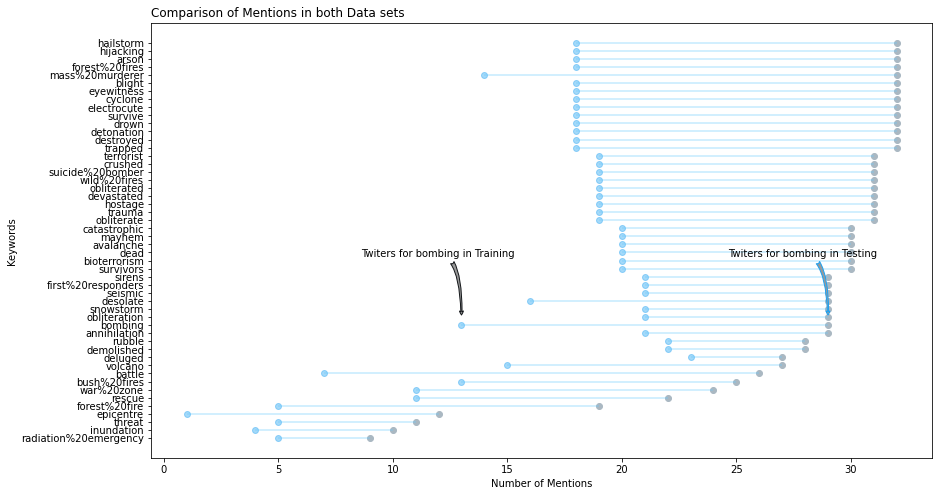

In [10]:
fig,ax = plt.subplots(1, figsize=(14,8))
# ------------------> Lolipop Graph 
#--> Visualize Keywords 
key_ = train_[train_.keyword.notna()][['keyword']].value_counts().reset_index().rename(columns = {0:'mentions'})
tkey_ = test_[test_.keyword.notna()][['keyword']].value_counts().reset_index().rename(columns = {0:'mentions'})
Vkey = pd.merge(key_, tkey_, on='keyword')
Vkey['Dif'] = Vkey.mentions_x - Vkey.mentions_y

#--> Re-Order and Following key_
ordered_ = Vkey.sort_values(by='mentions_x')[:50]
range_ = Vkey.sort_values(by='mentions_x')['keyword'].values[:50]
dif = Vkey.sort_values(by='mentions_x')['Dif'].values[:50]

ax.hlines(y=range_ ,xmin=ordered_['mentions_x'], xmax= ordered_['mentions_y'], color = '#6ACAFE', alpha = 0.4)
ax.scatter(ordered_['mentions_x'], range_, color='#AAB8C2', alpha=1, label='Mentions in training set')
ax.scatter(ordered_['mentions_y'], range_, color='#1DA1F2', alpha=0.4 , label='Mentions in testing set')

# Add title and axis names
ax.set_title("Comparison of Mentions in both Data sets", loc='left')
ax.set_xlabel('Number of Mentions')
ax.set_ylabel('Keywords')

ax.annotate('Twiters for bombing in Training', xy=(13,15), xycoords='data',xytext=(-100,60), textcoords='offset points',
            arrowprops=dict(arrowstyle='fancy',fc='0.6',connectionstyle="angle3,angleA=0,angleB=-90",color="#14171A"))
ax.annotate('Twiters for bombing in Testing', xy=(29,15), xycoords='data',xytext=(-100,60), textcoords='offset points',
            arrowprops=dict(arrowstyle='fancy',fc='0.6',connectionstyle="angle3,angleA=0,angleB=-90",color='#1DA1F2'));

<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
<p>Second Graph <b>The Tree map</b> is just showing the word distribution normalized:</p>
<li>It means the greater the number is or closer to 1, its importance is greater the dataset (for training set onlu) </li>

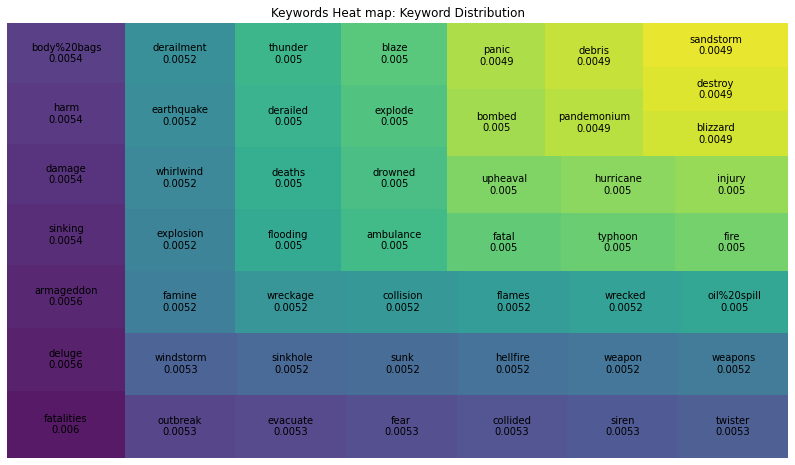

In [11]:
fig,ax = plt.subplots(1, figsize=(14,8))
# -----------> Heat map
cate = train_['keyword'].value_counts().head(50).index
values = np.round(train_['keyword'].value_counts(normalize=True).head(50).values,4)

color = ['#1DA1F2','#657786','#AAB8C2','#E1E8ED','#F5F8FA']
labels = [f"{cate_}\n{values_}" for cate_,values_ in zip(cate,values)]
squarify.plot(sizes=values, label=labels, alpha=.9 ,ax=ax, color=plt.cm.viridis.colors[1:250:5])
ax.set_title('Keywords Heat map: Keyword Distribution')
ax.axis('off');

<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
<p>Third Graph <b>Histogram & Pie chart </b>:</p>
<li>The first histogram is showing the length distribution: <b>Most of the Fake and Real Twitter are between125 - 140s letter by twitter</b> therefore try to classify those twitter based on their length it is not doable.</li>
<li>The second histogram shows pretty much the same , however we can notice the peak at 1600 which mens most of the twitter in train have <b>between 130-140 letters</b></li>
<li>The Third Graph is the <b>amount of</b> Fake twitter vs Real ones </li>

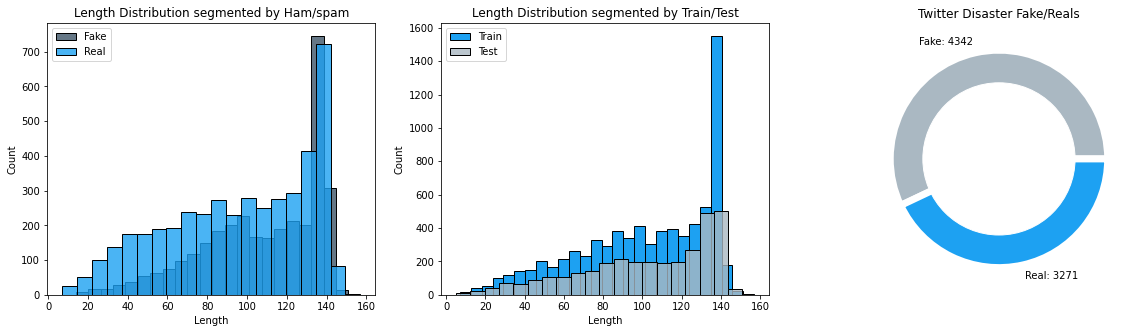

In [12]:
target_1 = train_[train_['target'] == 1][['Length']]
target_0 = train_[train_['target'] == 0][['Length']]

fig,ax = plt.subplots(1,3,figsize=(20,5))

# # ---------------------> Pie chart
ax[2].set_title('Twitter Disaster Fake/Reals')
names_= list(train_['target'].value_counts().index)
size_= list(train_['target'].value_counts().values)
labels = [f'{name}: {values}' for name,values in zip(['Fake','Real'],size_)]

#--> Creating circle 
my_circle = plt.Circle( (0,0), 0.7 , color='white')

#--> customizing Wedges
plt.pie(size_, labels= labels , wedgeprops = { 'linewidth' : 7,'edgecolor':'white'} ,
        colors = ['#AAB8C2','#1DA1F2'])
ax[2]= plt.gcf()
ax[2].gca().add_artist(my_circle);

ax[0].set_title('Length Distribution segmented by Ham/spam')
sns.histplot(data=target_1, x='Length',  fill=True, alpha=1,color= "#657786",ax=ax[0], label = 'Fake' )
sns.histplot(data=target_0, x='Length',  fill=True, alpha=0.8,color= "#1DA1F2",ax=ax[0], label = 'Real')
ax[0].legend()


ax[1].set_title('Length Distribution segmented by Train/Test')
sns.histplot(data=train_, x='Length',  fill=True, alpha=1,color= "#1DA1F2",ax=ax[1], label = 'Train')
sns.histplot(data=test_, x='Length',  fill=True, alpha=.8,color= "#AAB8C2",ax=ax[1], label = 'Test')
ax[1].legend();

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "5"></a>
    <p style="padding: 15px;
          color:white;">
        Machine Learning
    </p>    
</div>

<p><h3> One of the most excited part <b> Machine Learning </b> Algorithms and more.</h3> </p>
<li> In this section I will use <b>Multinominal Naive Bayes</b> which is basically coun the number of words and calculate the prior probabilities </li>
<li><b>Support Vector Machine</b> another powerfull algorithm which has been used a lot in text classification </li>
<li><b> RandomForest </b></li>
<p> <b>Note:</b> I am splitting first into train and test and then I will use <b>Pipeline</b> for CounterVectorizering and TfidTransforming, next I compare Countervectorize vs Tfidtransform </p>
<li> <b>Pipelines help avoid leaking statistics</b> from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.</li>

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:white ;
       font-size:200%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "5"></a>
    <p style="padding: 15px;
          color:red;">
        Warning
    </p>    
</div>

<p style= "font-size:150%;color:red;" > ----> Some twitters have been misslabeled before going forward we must fix those </p>

In [13]:
# ----> Labels
MLabel = train_.groupby(['text']).nunique().sort_values(by='target',ascending=False)
MLabel.head(3)

,id,keyword,location,target,Length,text_
text,,,,,,
like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,2,2,1,2,1,1
Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!,2,1,1,2,1,1
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',6,1,1,2,1,1


In [14]:
MLabel_ =  MLabel[MLabel['target'] > 1]['target'].index

# ----> Finding 
indexes = []
for tweet in MLabel_:
    position= train_[train_['text']==str(tweet)].index
    for index_ in position:
        indexes.append(index_)
        
train_.loc[indexes,['text','target']][0::2].head(5)

,text,target
1221,like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,1
4306,Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!,0
4284,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',0
4292,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',1
4309,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',0


In [15]:
new_label_= {'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit':0,
 'Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!':0,
"The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'":0,
 "In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!":0,
 "To fight bioterrorism sir.":0,
 "Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE":0,
 "#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption":1,
 "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect":0,
 "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam":0,
 "RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG":1,
 "Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife":1,
 "CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring":1,
 "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...":0,
 "wowo--=== 12000 Nigerian refugees repatriated from Cameroon":0,
 ".POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4'":1,
 "Caution: breathing may be hazardous to your health.":1,
 "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????":0,
 "that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time":0,
"Businesses are deluged with invoices. Make yours stand out with colour or shape and it's likely to rise to the top of t e pay' pileq":0}

# ------> Relabeling 
train_['new_label'] = train_['target']
for key, value in new_label_.items():
    train_.loc[train_['text'] == str(key) ,['new_label']] = value
    
train_.loc[indexes,['text','new_label']][0::2].head(5)

,text,new_label
1221,like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,0
4306,Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!,0
4284,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',0
4292,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',0
4309,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',0


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn import svm

#All models
models = []

#Final Corpus 
y = train_['new_label'].values
train_corpus = train_.text_.values
test_corpus = test_.text_.values

X_train, X_test, y_train, y_test = train_test_split(train_corpus, y, test_size=0.3, random_state=0, stratify=y)

#Final Corpus
display_side_by_side(train_.loc[xprows,['text']],train_.loc[xprows,['text_']])

,text
25,No way...I can't eat that shit
479,Attack on Titan game on PS Vita yay! Can't wait for 2016
738,@burberryant bleeding on the brain don't know the cause
825,My mic and controllers aren't working one second
868,If it wasn't for the Blood! ????
870,Ain't no hoe in my blood
1023,Ain't no bags in the trunk it's a body
1098,I can't believe @myfriendmina photo bombed a screenshot
1269,@Wild_Lionx3 so others don't get burned
1278,Don't get burned twice by the same flame.


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "5.1"></a>
    <p style="padding: 15px;
          color:white;">
        First Selection
    </p>    
</div>
<p> In here I will use <b>Pipeline and Cross Vaidation</b> to find my best option in term of specificity and precision</p>

<li> <b>Pipeline</b> Pass all the algorithms and return the Score using <b> Cross validate </b> : <b>'accuracy','recall','precision','f1'</b> </li>

In [17]:
results_ = []
scoring = ['accuracy','recall','precision','f1']
Model = [MultinomialNB(),svm.SVC(kernel ='rbf'),PassiveAggressiveClassifier(), RandomForestClassifier(max_depth= 30)]

for algo in Model:
    Pipe_ = Pipeline([('CounterVF', CountVectorizer(analyzer = Pre_toke)),
                      ('TfidF', TfidfTransformer()),('Model', algo)])
    
    scores = cross_validate(Pipe_,X_train,y_train,cv=6,scoring = scoring)
    results_.append(scores)
    
df_result = pd.DataFrame()
for position in range(0,len(results_)):
    df = pd.DataFrame(data = results_[position])
    df['model'] = str(Model[position].__class__.__name__)
    df_result = df_result.append(df, ignore_index=True)
    
df_result.sort_values('test_precision',ascending = False).head(4)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1,model
22,9.102831,1.993991,0.754505,0.450000,0.950000,0.610714,RandomForestClassifier
19,8.768274,1.834488,0.742117,0.430446,0.931818,0.588869,RandomForestClassifier
21,9.435155,1.601766,0.737613,0.418421,0.929825,0.577132,RandomForestClassifier
23,8.943659,1.644401,0.739865,0.428947,0.920904,0.585278,RandomForestClassifier


<p><h3> Which model should I choose? </h3></p>
<p>This is the most important part,<b> Before</b> I used to think that accuracy was the <b>best way</b> to measure a model, get 100% is the best I thought , however now I know that there are many thing to consider</p>
<li>Sensitivity , Specificity , Threshold and many more, if you are not familiar with this think of it like , the rate or ability that my model have to be truthful because models are not 100 accurate and if it is "probably is overfitting" </li>
<li> Imagine you have a ML that predict all samples as Disaster, including those which are not <b> think about all the money spent to move all equipment to that place and realize that was a mistake.  </b>  this is high Sensitivity</li>
<li> Now think of a model that is only predict 'no disaster' , can you imagine yourself running late to the disaster palce because your system still saying "there are not diaster" that is high precision so here is when you have to play with this two factor and decide <b> Do I model that tell me everything is fine but it is not or one that tell me this is a disaster and maybe it is not ? </b> </li>
    
<p><h4>Answer : That depends on your project / customer needs. </h4></p>
<p> In my case I rather to have a model that tell me "hey this is a disaster when it is not , however i will train and re-train until this error is minimized:</p>
<li> I will use <b>RandomForestClassifier ans SVC </b> because it offers me more hyperparameters, Multinomial is great but depends a lot on the input and PassiveAggressiveClassifier is effective for data processed in real time which is not the case here </li>
<li> Later I will use Deep learning </li>

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "5.2"></a>
    <p style="padding: 15px;
          color:white;">
        Normal Parameters
    </p>    
</div>
<li> <b>Algorithms:</b> using both algorithms to evaluate the first predictions</li> 
<h4>At this poin I got <b> 79.9 Accuracy</b> in this Kaggle Competition</h4>

In [18]:
prediction = []
pre_transform = Pipeline([('CounterVF', CountVectorizer(analyzer = Pre_toke)),
                      ('TfidF', TfidfTransformer()),]).fit(train_corpus)

Model = [svm.SVC(kernel ='rbf'), RandomForestClassifier(),MultinomialNB()]

for algo in Model:
    CLS = algo.fit(pre_transform.transform(train_corpus),y)
    predict_ = CLS.predict(pre_transform.transform(test_corpus))
    frame = pd.DataFrame()
    frame['id'] = test_['id']
    frame['target'] = predict_
    frame.to_csv("{modelname}.csv".format(modelname = algo.__class__.__name__))

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "5.1"></a>
    <p style="padding: 15px;
          color:white;">
        HyperParameter
    </p>    
</div>

<li> <b>SVM and RDF</b> Hyperparameters with <b>RandomizedSearchCV </b> </li>
<li> <b> Uncomment </b> the following code to find the hyper parameters<\li>

In [19]:
BParameters_ = []

# Hyper Parameters
params = [{'SVC__C': [1,10,100,1000],'SVC__gamma':[1,0.1,0.01,0.001],'SVC__kernel':['rbf','linear']},
          {'RandomForestClassifier__max_depth':[10,15,30,40,50],'RandomForestClassifier__min_samples_split':[2,4,6,8],'RandomForestClassifier__min_samples_leaf':[3,4,5,6]}]

Model = [svm.SVC(), RandomForestClassifier()]
for algo_pos in range(0,len(Model)):
    Pipe_ = Pipeline([('CounterVF', CountVectorizer(analyzer = Pre_toke)),
                      ('TfidF', TfidfTransformer()),(str(Model[algo_pos].__class__.__name__), Model[algo_pos])])
    
# #     RDSearch  = RandomizedSearchCV(Pipe_,param_distributions=params[algo_pos],cv=4)
# #     RDSearch.fit(train_corpus,y)
# #     BParameters_.append(RDSearch.best_params_)


In [20]:
CL1 = RandomForestClassifier(max_depth= 30)
CL2 = svm.SVC(kernel ='rbf', gamma = 1 , C=1,probability=True)
CL3 = MultinomialNB()

VC = VotingClassifier(estimators=[('RDF',CL1),('SVM',CL2),('NBM',CL3)],
                      voting = 'soft')
VC.fit(pre_transform.transform(train_corpus),y)
VCpred = VC.predict(pre_transform.transform(test_corpus))
frame = pd.DataFrame()
frame['id'] = test_['id']
frame['target'] = VCpred

frame.to_csv("{modelname}_.csv".format(modelname = VC.__class__.__name__))

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "6"></a>
    <p style="padding: 15px;
          color:white;">
        Deep Learning
    </p>    
</div>
<p> And Now another excited part <b> Deep learning</b> Using Tensorflow to build Embedding Layers to create FNN LSTM and GRU</p>

In [21]:
import tensorflow.keras as tf
from tensorflow.keras.layers import Activation, MaxPooling1D,BatchNormalization,Conv1D,Dropout,GlobalMaxPooling1D
from tensorflow.keras.layers import Dense,Flatten,Embedding, LSTM, GRU ,GlobalAveragePooling1D,MaxPooling1D,Bidirectional
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD, Adam,schedules
from tensorflow.keras.models import Sequential 

In [22]:
# Preprocessing 
Token = Tokenizer()
Token.fit_on_texts(train_corpus)

Token_t = Tokenizer()
Token_t.fit_on_texts(test_corpus)

# set up 
Voc_size = len(Token.word_index)+1 #13059
Max_length = 30
output_dim = 7

# Enconding twitters
Enc_Tw = [one_hot(twit,Voc_size) for twit in train_corpus]
Enc_Tw_test = [one_hot(twit,Voc_size) for twit in test_corpus]


Pad_Tw = pad_sequences(Enc_Tw, maxlen = Max_length , padding= 'post')
Pad_Tw_test = pad_sequences(Enc_Tw_test, maxlen = Max_length , padding= 'post')

# Splitting Data 
X_train, X_test, y_train, y_test = train_test_split(Pad_Tw, y, test_size=0.2, random_state=104, stratify=y)

# Settting 
optimizer= Adam()
loss = tf.losses.BinaryCrossentropy(from_logits=True,)

In [23]:
model = Sequential()
model.add(Embedding(input_dim = Voc_size,output_dim =output_dim,mask_zero=True,
                     input_length = Max_length,embeddings_regularizer = tf.regularizers.L2(1e-4)))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling1D())
model.add(Dense(5,kernel_initializer='he_uniform',kernel_regularizer=tf.regularizers.L2(0.1),activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizer, loss=loss, metrics = ['accuracy'])
model.fit(X_train , y_train , batch_size=128, epochs = 70, validation_data = (X_test,y_test))

2022-12-12 14:37:40.509251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 14:37:40.625976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 14:37:40.626850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 14:37:40.628746: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/70
48/48 [==============================] - 2s 7ms/step - loss: 1.7498 - accuracy: 0.5816 - val_loss: 1.6611 - val_accuracy: 0.5923
Epoch 2/70
48/48 [==============================] - 0s 4ms/step - loss: 1.5841 - accuracy: 0.6581 - val_loss: 1.5068 - val_accuracy: 0.6586
Epoch 3/70
48/48 [==============================] - 0s 4ms/step - loss: 1.4381 - accuracy: 0.6990 - val_loss: 1.3722 - val_accuracy: 0.6848
Epoch 4/70
48/48 [==============================] - 0s 4ms/step - loss: 1.3105 - accuracy: 0.7028 - val_loss: 1.2553 - val_accuracy: 0.6934
Epoch 5/70
48/48 [==============================] - 0s 3ms/step - loss: 1.2006 - accuracy: 0.7080 - val_loss: 1.1545 - val_accuracy: 0.7157
Epoch 6/70
48/48 [==============================] - 0s 4ms/step - loss: 1.1061 - accuracy: 0.7197 - val_loss: 1.0681 - val_accuracy: 0.7275
Epoch 7/70
48/48 [==============================] - 0s 4ms/step - loss: 1.0252 - accuracy: 0.7200 - val_loss: 0.9944 - val_accuracy: 0.7380
Epoch 8/70
48/48 [==

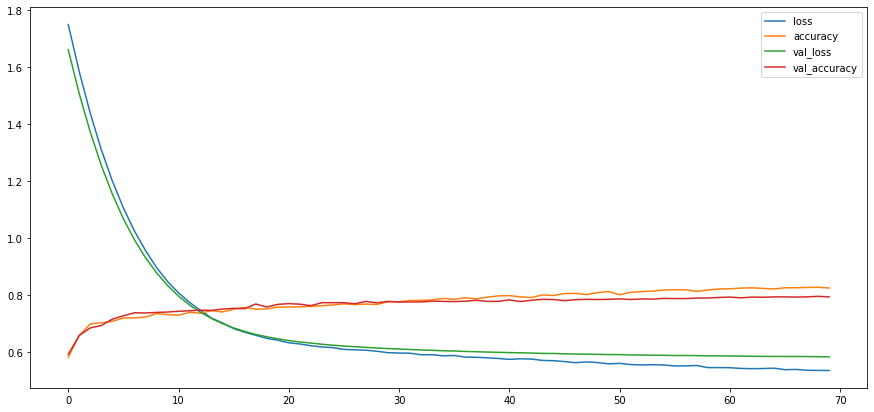

In [24]:
pd.DataFrame(model.history.history).plot(figsize=(15,7))
plt.show()

In [25]:
#submit
prediction = model.predict(Pad_Tw_test) 
results = [1 if pred_ >= 0.5 else 0 for pred_ in prediction]
df = pd.DataFrame()
df['id'] = test_['id']
df['target'] = results
df.to_csv('FS_deep_1st.csv')

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "6.2"></a>
    <p style="padding: 15px;
          color:white;">
        Word2Vector
    </p>    
</div>
<p> The hight Accuracy is 79.9 but now using <b> Word2vectore</b> I am aming to have a better approach,, because each word will be a vector, it is pretty much the same like embedding layer however this one has been pre-trained with only god knows how many words</p>
<li> Load the corpus from here <b>kaggle</b></li>
<li> Trasnform the corpus into arrays</li>
<li> Then compare those word that are in my data and in the Word embedding </li>
<li> Find the <b> percentage of words </b> presents in my the embedding from my corpus</li>
<li> Copy the weights and put them into a Embedding layers using keras <b> notice </b>that this must not be <b>re-trained </b> or we gonna have a mess </li>

In [26]:
# -----> Using word2vector weights 
Embeddings= {}
Embedding_dimension = 100

with open('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt','r') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        Embeddings[word] = vectors

In [27]:
EMB_DIM = 100
EM_TR_NO,EM_TS_NO = [],[]  # EM = Embedding, TR/TS = Train / Test , NO = No in 
EMB_WEIGHTS = np.zeros((Voc_size,EMB_DIM)) # Matrix of numebrofwordsX100


for word, postition in Token.word_index.items():
    EMB_VECTOR = Embeddings.get(word) #take the dict key and find the word in the dict
    if EMB_VECTOR is not None:
        EMB_WEIGHTS[postition] = EMB_VECTOR # this because the dict position start in 1 not 0 
    else: # it is because the word from the traning set in not in the embedding
        EM_TR_NO.append(word)

for word, i in Token_t.word_index.items():
    EMB_VECTOR = Embeddings.get(word)
    if EMB_VECTOR is None: # ithe word from the test set it is not in the embedding
        EM_TS_NO.append(word)
        
Train_Embedding = len(EM_TR_NO)*100/len(Token.word_index)
Test_Embedding = len(EM_TS_NO)*100/len(Token_t.word_index)
print(f"The Embedding Contains {np.round(100-Train_Embedding,2)}% of the words in the Training set")
print(f"The Embedding Contains {np.round(100-Test_Embedding,2)}% of the words in the Test set")
print("These are some of the missing words in the embedding:\n")
print(EM_TR_NO[1:5],EM_TS_NO[1:5])

The Embedding Contains 90.53% of the words in the Training set
The Embedding Contains 92.67% of the words in the Test set
These are some of the missing words in the embedding:

['mh370', 'theyare', 'disea', 'bestnaijamade'] ['mh370', 'theyare', 'funtenna', 'subreddits']


In [28]:
optimizerA,optimezerSG= Adam(1e-4) , SGD(learning_rate=0.01, momentum=0.9)
model = Sequential()
model.add(Embedding(input_dim = Voc_size,output_dim =100,input_length = Max_length, weights= [EMB_WEIGHTS], trainable=True))
model.add(Dropout(0.3))
model.add(GRU(15,dropout=0.3,return_sequences=True))
model.add(Bidirectional(GRU(15,dropout=0.3)))
model.add(Dense(5,kernel_initializer='glorot_uniform',activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimezerSG, loss=loss,metrics = ['accuracy'])
model.fit(X_train , y_train , batch_size = 128, epochs = 200, validation_data = (X_test,y_test))

Epoch 1/200


2022-12-12 14:38:23.489466: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


48/48 [==============================] - 6s 26ms/step - loss: 0.6860 - accuracy: 0.5570 - val_loss: 0.6837 - val_accuracy: 0.5726
Epoch 2/200
48/48 [==============================] - 0s 9ms/step - loss: 0.6830 - accuracy: 0.5708 - val_loss: 0.6817 - val_accuracy: 0.5719
Epoch 3/200
48/48 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.5716 - val_loss: 0.6801 - val_accuracy: 0.5719
Epoch 4/200
48/48 [==============================] - 0s 9ms/step - loss: 0.6813 - accuracy: 0.5714 - val_loss: 0.6784 - val_accuracy: 0.5719
Epoch 5/200
48/48 [==============================] - 0s 10ms/step - loss: 0.6806 - accuracy: 0.5744 - val_loss: 0.6774 - val_accuracy: 0.5712
Epoch 6/200
48/48 [==============================] - 0s 10ms/step - loss: 0.6792 - accuracy: 0.5721 - val_loss: 0.6761 - val_accuracy: 0.5719
Epoch 7/200
48/48 [==============================] - 0s 9ms/step - loss: 0.6787 - accuracy: 0.5711 - val_loss: 0.6743 - val_accuracy: 0.5739
Epoch 8/200
48/48 [===

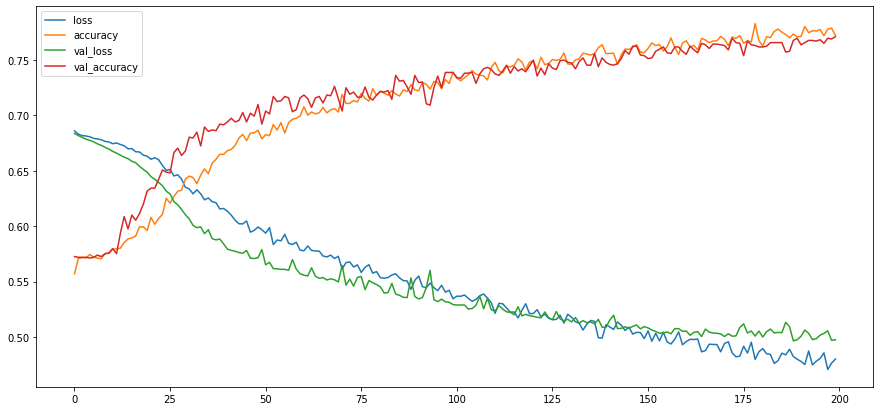

In [29]:
pd.DataFrame(model.history.history).plot(figsize=(15,7))
plt.show()

<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "6.3"></a>
    <p style="padding: 15px;
          color:white;">
        Checking Spelling
    </p>    
</div>
<p>After trying several architectures <b> LSTM GRU BiLSTM and many more</b> I decided to check those word that were note found in the embedding, once I found them, I correct the spelling of those which I consider could be in the embedding</p>
<li> In the following <b>dicctionaries</b> you will find many words that has been corrected</li>
<li> After that I create again another Embedding with new weight according to the corpus</li>
<li> I run again the First machine learning models and deep learning </li>
<li> at this point <b> there is nothing else i can do  </b> only submmit my results and wait for more feedbacks</li>
<li> but the way I read that the anserw of this competition is available on the web , but i didnt want to cheat and submit those answer but you can always look for them </li>

In [30]:
train_spelling = {'demostration':'demonstration','youare':'you are','mh370':'mention','theyare':'they are','subreddits':'sub reddit', 'disea':'disease','idk':'i dont know','mediterran':'mediterranean','icemoon':'ice min','lgl':'Lee Green Lives',
                  'org':'organization','selfies':'selfie','lmao':'laughing my ass off','abbswinston':'abbs winston','saddlebrooke':'saddle brook','hwo':'how would one','reaad':'read','theyll':'they will','prepper':'Survivalists','hitchbot':'mention',
                  'uare':'you are','unkn':'unknown','cpanel':'mention','hahaha':'laughing','retweet':'re tweet','godslove':'god love','weallheartonedirection':'we all heart one direction','selfie':'selfi','specif':'specific','omfg':'mention','dannic':'mention',
                  'idgaf':'song','boonew':'mention','theyd':'they would','cuase':'because','firebeatz':'mention','hihow':'hi how','stationright':'station right', 'subsecretariat':'sub secretariat','sincerety':'sincerity','prkng':'parking','kaiserjaegers':'army',
                  'satoshis':'mention','atgames':'at games','bestie':'best friend','timedoes':'time does', 'triplemania':'triple mania','liquidslap':'liquid splap','anq':'and','likkly':'likely','standwout':'stand out','invzices':'invoices','invoicesx':'invoices',
                  'smth':'something', 'invoicew':'invoices', 'colouj':'colour','ikely':'likely','ivoices':'invoices','smtx':'sometimes','aboortioonnns':'abortions','consis':'consist', 'currong':'currying','mothernaturenetwork':'mother nature network','sideness':'sidedness',
                  'interestud':'interested','leftside':'left side','demonstratio':'demostration','wroug':'wrong','epilept':'epileptic','fcking':'fucking','befoooore':'before','photoset':'photo set','hookier':'hooker','viayoutube':'via youtube','epicen':'epicenter',
                  'itll':'it will','anythin':'anything','bedhair':'bed hair','cornwalls':'corn walls','leaveevacuateexitbe':'leave evacuate exit be','evaucation':'evacuation','newsbrokenemergency':'news broken emergency','servicesgold':'service gold',
                  'coastpowerlinetramtr':'coast power line','ktchn':'kitchen','swayback':'sway back','whattt':'what','fangirl':'fan girl','newsthousands':'news thousand','recks':'reck','kostumes':'costumes','plez':'please','silentmind':'silent mind','liveleakfun':'live leak fun',
                  'zimpapersviews':'zim paperss views','submitt':'submit', 'contd':'continued','hwrf':'hurricane weather research and forecasting model','turdnado':'tornado','forgeting':'forgetting','alsowhat':'also what','speculatio':'speculation', 'sequalae':'sequelae',
                  'leonardville':'leonard ville','urg':'urgent','recordand':'record land','barkevious':'mention','follownflnews':'mention', 'ddnt': 'did not','commentes':'comments','pornhub':'mention','megalpolis':'mention','nagaski':'nagasaki','owenrbroadhurst':'owner broad hurst',
                  'juanmthompson':'mention','blowjobs':'blow jobs', 'hillarymass':'mention', 'bestie':'best friend', 'followback':'follow back', 'dubloadz':'mention', 'droppd':'dropped', 'watchout':'watch out', 'assertative':'assortative', 'worseits':'worst it is','dorett':'dorette',
                  'dorette':'dorette','hatman':'hat man','unsensibly':'insensible','defensenews':'defense news','subsd':'scalar double precision floating point subtract','sandunes':'mention','hamptonroadsfor':'place','damnn':'damn','renewsit':'re new sit','whensoever':'when soever', 
                  'kontrolled':'controlled','disclos':'disclose', 'notwill':'not will', 'arequiem':'requiem', 'deadgirltalking':'dead girl talking', 'unfortunemelody':'ufortune melody', 'goodlook':'good look', 'headdesk':'head desk', 'savs':'says','laughtraders':'laugh traders', 
                  'astroturfers':'astroturfing', 'tindering':'use tinder', 'fundwhen':'fund when', 'pipeliners':'pipe lines', 'ireporter':' i reporter', 'thnk':'think', 'victimiser':'victimize','reaad':'read', 'marrie':'mention', 'mazing':'amazing', 'transwomen':'trans womn', 
                  'championsblackfoot':'champions black foot', 'notpanic':'not panic', 'firefightr':'fire figther', 'workd':'worked', 'lookg':'looked','postapocalypticflimflam':'post apocalyptic flimflam','lookss':'looks','wordk':'worked','socialwots':'social bots','airhorns':'air horns','cryibg':'crying',
                  'mommys':'mommy','femnism':'feminism','laighign':'laughing','fangirling':'fan girling', 'swiming':'swimming','whitewalkers':'white walkers','greatt':'great','youare':'you are','mh370':'mention', 'theyare':'they are', 'subreddits':'sub reddit', 'disea':'disease',
                  'idk':'i dont know','mediterran':'mediterranean','icemoon':'ice min','lgl':'Lee Green Lives','org':'organization', 'selfies':'selfie', 'lmao':'laughing my ass off', 'abbswinston':'abbs winston', 'saddlebrooke':'saddle brook','hwo':'how would one','reaad':'read','theyll':'they will',
                  'prepper':'Survivalists','hitchbot':'mention','uare':'you are','unkn':'unknown','cpanel':'mention','hahaha':'laughing','retweet':'re tweet','godslove':'god love','weallheartonedirection':'we all heart one direction','selfie':'selfi','specif':'specific','omfg':'mention','dannic':'mention',
                  'idgaf':'song','boonew':'mention','theyd':'they would','cuase':'because','firebeatz':'mention','hihow':'hi how','stationright':'station right','subsecretariat':'sub secretariat','sincerety':'sincerity', 'prkng':'parking','kaiserjaegers':'army', 'satoshis':'mention','atgames':'at games',
                  'bestie':'best friend','timedoes':'time does','triplemania':'triple mania','skarlet':'video game character','ny2':'new york two','dilapitated':'dilapidated','darkspawn':'game','monumentalized':'monumentalize','optiks':'opticks','probaly':'probably','xoxoxxxoo':'Hugs and kisses','rutinaofficial':'mention',
                  'nbchannibal':'mention','nor0603':'mention','criess':'cries','issit':'is sit','adultress':'adulteress','coldwood':'cold wood','loccitane':'company','idiota':'idiot','hanbags':'hand bang','bestfriends':'best friend','somaliaeritrea':'mention','urgentthere':'urgent there','oworoshoki':'mention','grea':'great',
                  'forestservice':'mention','vandalzing':'vandalizing','wgton':'mention','aldwark':'city','nyorks':'new york','brandace':'mention','hermancranston':'mention','enemity':'enemy','privlege':'privilege','maccocktail':'mention','retweeting':'re tweet','apocaly':'apocalip','nyclass':'new york class','expecte':'expected','unfortun':'unfortunate','smantibatam':'mention','bbecause':'because','niley':'mention','innit':'is it not','hairity':'hairy','spitty':'mention','whoevers':'who ever','damnn':'damn', 'jojowizphilipp':'mention','lmk':'song','appadvice':'app advice','freakingg':'freaking','sportwatch':'sport watch','gigatech':'giga tech','waige':'waige','niggah':'nigga','tradery':'traderie','gunsmissilesbombs':'mention','lotm':'lord of the mics','fleshgod':'mention','emmeryn':'game','memez':'funny picture','politifiact':'politifact','xshanemichaelsx':'mention','instaxbooty':'mention','tumbleon':'mention', 'knw':'know','waianapanapa':'place','news5':'news 5 ','kindlng':'kindling','glowng':'glowing','frnch':'french','tbh':'to be honest','hvy':'company','jplocalfirst':'mention','eliotschool':'mention','ofclans':'of clans','multidimensi':'multidimensions','multidimen':'multidimensions','multidimensio':'multidimensions','structur':'structure','multidimensiona':'multidimensional','multidime':'multidimensions','klinenberg':'mention','investigatin':'investigation','malyasiaairlines':'mention','liveleakfun':'mention','momentsathill':'mention','nonononono':'no','crunchysensible':'mention','snctions':'sanctions','hostagesthrosw':'mention','hlps':'helps','angelriveralib':'mention','times4':'time for','hegot':'he got','cmon':'come on','uiseful':'useful','alredy':'already','joketheyare':'mention','twitterpated':'mention','tommygshow':'mention','lides':'lid','icaseit':'mention','ramify':'ramify','multitudinal':'multitudinal','colorlines':'color lines','yougslavia':'yugoslavia','timesnewsdesk':'time news desk','terraria':'mention','pakistanex':'pakistan','bdays':'brithdays','featcha':'mention','madsummer':'mad summer','yknow':'you know','truthfrequencyradio':'truth frequency radio','fishtails':'fish tails',
                  'schematization':'schematize','mindkiller':'mind killer','gallups':'company','hangarback':'mention','disclos':'disclose','coinflip':'coin flip','shtfplan':'shift plan','changelessly':'changeless','dirtylying':'dirty lying','ixed':'fixed','firstaid':'first aid','revel8ion':'revelation','skynews':'skyn ews',
                  'nigeriantribune':'nigerian tribune','hangi':'hanging','carryi':'carrying','theonion':'the onion','allahuakbar':'allahu akbar','elsewere':'else where','cindynoonan':'mention','eurpoe':'europe','lyricaleyes':'mention','forreal':'for real','sayingdarude':'saying darude','yess':'yes','omlette':'omelette','beachboyirh':'company','oorr':'or','worldoil':'world oil','detectado':'detected','escuchando':'heard','collab':'collaboratory','fckng':'fucking','misocapnist':'misocapnist','zouis':'mention','rightways':'rigth ways','thing2':'thing two','godjesus':'god jesus','killedsomebody':'killed somebody','couldve':'could have','idek':'i dont even know','idkidk':'i do not know','fotoset':'fotp set','progessive':'progressive','timesofindia':'time of india','bstrd':'bastard','takig':'taking','anoder':'another','wrld':'world','technews':'tech news','thediyhacks':'mention','illusionimagess':'illusion images','walktrough':'walkthrough','recentlu':'recently','sumthng':'something','approachng':'approaching','suddendly':'suddenly','epicente':'epicenter','seasonfrom':'season from','onshit':'oh shit','terrellt':'mention','splattling':'video game weapon','fucboi':'fuck boy','nowlike':'now like','netnewsledger':'mention','timelapse':'time lapse','competetion':'competition','reddits':'redit','beforeitsnews':'before its news','selfi':'self picture photograph','selfie':'self picture photograph','demostration':'demostration','connecto':'connector','nowplaying':'now playing','worldnews':'world news',
                  'throwingknifes':'throwing knifes','hahahah':'haha','foxnew' :'fox news','retweeted':'re tweeted','iclown':'i clown','kowing':'knowing','hahah':'haha','abcnews':'abc news','incase':'in case','hahahaha':'haha',
                  'linerless':'liner less','multidimensions':'multi dimensional','notexplained':'not explained','forsure':'for sure','dickheads':'dick head','douchebag':'douche bag','areddit':'a reddit','bbcnews':'bbc news',
                  'marketforce':'market force','rigth':'right','coool':'cool','evildead':'evil dead','starmade':'star made','bookslast':'books last','latimes':'last time','hotboy':'hot boy','jokin':'joking','vigilent':'vigilant',
                  'fantabulous':'awesome','handside':'hand side','benothing':'be nothing','morebut':'more but','infowars':'info wars','loosers':'losers','clergyforced':'clergy forced','bioterrorismi':'bioterrorism','kidnapg':'kidnap',
                  'alrighty':'all right','skywars':'sky wars','sothwest':'south west','instagrams':'instagram','drumstep':'drum step','everyones':'every one','dialyses':'dialysis','everwhe':'every where','looool':'laughing out loud',
                  'aggressif':'aggressive','cleav':'clean','bigstar':'big star','mycareer':'my career','bowknot':'bow knot','womengirls':'womengirls','shadowflame':'shadow flame','floatin':'floating','whatevs':'what ever',
                  'awesomeeee':'awesome','runkeeper':'run keeper','tounge':'tongue','intead':'instead','awesomesauce':'awesome','fatburning':'fat burning','techniqu':'technique','socialtimes':'social times','recip':'recipes','produc':'product','misfortunebut':'misfortune but',
                  'tweetstorm':'tweet storm','reportly':'report','lindenow':'linde now','saudies':'people from south arabia','eurocrisis':'euro crisis','timestack':'time stack','hadnt':'had not','carhot':'car hot','crashsterling':'crash sterling',
                  'joeysterling':'joey sterling','havnt':'haven not','womem':'womrn','oclock':"o'clock",'fuckboy':'fuck boy','fucktard':'fuck hard','snotgreen':'snot gree','individl':'individual','hhahaha':'haha','lightrail':'ligh trail',
                  'nbcnightlynews':'nbc night news','cerography':'xerography','susinesses':'businesses','stlnd':'stand','togthe':'together','invokces':'invoices','fuckface':'fuck face','wineisdumb':'wine is dumb','isllikely':'is likely',
                  'clothesless':'clothes less','precisionistic':'precisionist','todayhave':'today have','urself':'yourself','abbruchsimulator':'abbruch simulator','foodstand':'food stand','worldpay':'word play','selfavowed':' self avowed',
                  'everythign':'everything','fcked':'fucked','newidea':'new idea','top25':'top 25','psalm34':'psalm 34','copperfields':'copper fields','littlebitofbass':'little bit of bass','fastings':'fasting','dilutional':'dilution',
                  'foxsportscom':'fox sports com','boylesports':'boy less sports','daughtery':'daugherty','destroyd':'destroyed','specialguest':'special guest','crapgamer':'crap gamer','headlinelike':'head line like','undergroundbestsellers':'under ground best sellers',
                  'googlemaps':'google map','obtaing':'obtain','blackburns':'black burns','indianperpetrated':'indian perpetrated','massgrave':'mass grave','briliantly':'brilliantly','conditionsprivation':'conditions derivation',
                  'mydrought':'my drought','reprocussions':'repercussions','protoshoggoth':'proto shoggoth','howare':'how are','riveer':'river','sometimesi':'some times','dravet':'illness','marvins':"marvin's",'wednes':'wednesday',
                  'erally':'literally','myelf':'myself','electrocutedboiling':'electrocuted boiling','speedtech':'speed tech','childfund':'company','treatmen':'treatment','painthey':'pain they','lifeits':'life it is ','yeaahh':'yeah',
                  'firefigthers':'firefighters','peice':'piece','bfore':'before','chaning':'changing','siteinvestigating':'site investigating','aredistribute':'redistribute','recal':'recall','windwaker':'video game character',
                  'policylab':'policy lab','gangstermail':'gangster mail','musicvideo':'music video','referencereference':'references','wrked':'worked','transporta':'transportation','sigalert':'sign alert','ohgod':'oh god',
                  'antiochhickoryhollow':'antioch hickory hollow','firefighte':'firefighter','intertissue':'inter issue','ndetention':'detention','thankkk':'thank','notificationsu':'notification','awesomelove':'awedome love',
                  'landsli':'land slide','heared':'heard','floorburnt':'floor burnt','alska':'alaska','seeweed':'seaweed','caribean':'caribbean','knowlddge':'knowledge','stormcoming':'storm coming','postering':'postponing',
                  'cityporn':'city porn','dumbass':'dumb ass','sterotypical':'stereotypical','eversafe':'ever safe','apocalpytic':'apocalyptic','paperss':'papers','nycfc':'new york city footballcClub','greyjoys':'grey joys',
                  'freebesieged':'free besieged','mwednesday':'wednesday','soever':'howsoever','ufortune':'u fortune','aannd':'and','antipozi':'antiposi','rezaphotography':'mention','romanatwoodvlogs':'mention','arefuse':'a refuse',
                  'figther':'fighter','ahahahga':'haha','sidjsjdjekdjskdjd':'haha','oamsgajagahahah':'haha','ohshit':'oh shit','win10':'windows 10','roomr':'room','10news':'10 news','intersectio':'intersection','abbandoned':'abandoned',
                  'horrormovies':'horror movies','queenmy':'queen my','songfor':'song for','heavydirtysoul':'heavy dirty soul','goooo':'go','radneck':'red neck','crqck':'crack','becyme':'young','youngins':'young','matchwood':'match wood',
                  'thundersnow':'thunder snow','comeee':'come','hawaiianpaddlesports':'hawaiian paddle sports','mypillowstudio':'my pillow studio','favorited':'favorite','niqqa':'nigga','rembr':'remember','alwsl':'windows subsystem for linux',
                  'hashd':'has hd','canadasuicide':'canada suicide','thursd':'thursday','backty':'mention','lonelyness':'loneliness','ayhhhdjjfjrjjrdjjeks':'nonsense','hotbox':'mention','daubt':'doubt','tsutomi':'tsunami','humanityi':'humanity',
                  'news786':'news 786','convivted':'convicted','shedid':'she did','islamaphobe':'islamophobia','heheh':'haha','fforecast':'forecast','ofcourse':'of course','prettyboyshyflizzy':'pretty boys shy flizzy','fricken':'stupid peice of crap',
                  'intragenerational':'intergenerational','learni':'learning','afrikaan':'afrikaans','happing':'happy','crptotech':'crypto tech','dvbbs':'mention','borgeous':'mention','arceen':'arce','todayi':'today','homefolks':'home folks',
                  'hardside':'hard side','tittie':'boobs','noemotion':'no emotion','liguistic':'linguistic','nbanews':'nba news','postexistence':'post existence','areporting':'reporting','nside':'inside','jasmines':'jazmines',
                  'blackcats':'black cats','ktfounder':'kt founder','amazingness':'amazing','finall':'final','articals':'articals','farmr':'farm','doessnt':'does not','listenlive':'listen live','lastingness':'durability',
                  'claimin':'claiming','morethan':'more than','celebrety':'celebrity','sorrower':'sorrow','kindof':'kind of','restrospect':'retrospect','newave':'new wave','amazondeals':'amazon deals','skylanders':'sky landers',
                  'ombudsmanship':'goverment investigator','gameofkitten':'game of kitten'}

test_spelling = {'youare':'you are','mh370':'mention', 'theyare':'they are', 'subreddits':'sub reddit', 'disea':'disease', 'idk':'i dont know', 'mediterran':'mediterran', 'icemoon':'ice min', 'lgl':'Lee Green Lives',
                 'org':'organization', 'selfies':'selfie', 'lmao':'laughing my ass off', 'abbswinston':'abbs winston','saddlebrooke':'saddle brook', 'hwo':'how would one', 'reaad':'read', 'theyll':'they will',
                 'prepper':'Survivalists', 'hitchbot':'mention', 'uare':'you are', 'unkn':'unknown', 'cpanel':'mention', 'hahaha':'laughing','retweet':'re tweet', 'godslove':'god love','weallheartonedirection':'we all heart one direction',
                 'selfie':'selfi','specif':'specific', 'omfg':'mention', 'dannic':'mention', 'idgaf':'song', 'boonew':'mention', 'theyd': 'they would',
                 'cuase':'because','firebeatz':'mention', 'hihow':'hi how', 'stationright':'station right','subsecretariat':'sub secretariat', 'sincerety':'sincerity', 'prkng':'parking', 'kaiserjaegers':'army', 
                 'satoshis':'mention', 'atgames':'at games', 'bestie':'best friend', 'timedoes':'time does', 'triplemania':'triple mania','skarlet':'video game character','ny2':'new york two',
                 'dilapitated':'dilapidated','darkspawn':'game','monumentalized':'monumentalize','optiks':'opticks','probaly':'probably','xoxoxxxoo':'Hugs and kisses ','rutinaofficial':'mention',
                 'nbchannibal':'mention','nor0603':'mention','criess':'cries','issit':'is sit','adultress':'adulteress','coldwood':'cold wood','loccitane':'company','idiota':'idiot','hanbags':'hand bang',
                 'bestfriends':'best friend','somaliaeritrea':'mention','urgentthere':'urgent there','oworoshoki':'mention','grea':'great','forestservice':'mention','vandalzing':'vandalizing','wgton':'mention',
                 'aldwark':'city', 'nyorks':'new york','brandace':'mention','hermancranston':'mention','enemity':'enemy','privlege':'privilege','maccocktail':'mention','retweeting':'re tweet','apocaly':'apocalip',
                 'nyclass':'new york class','expecte':'expected','unfortun':'unfortunate','smantibatam':'mention','bbecause':'because','niley':'mention','innit':'is it not','hairity':'hairy','spitty':'mention',
                 'whoevers':'who ever','damnn':'damn', 'jojowizphilipp':'mention','lmk':'song','appadvice':'app advice','freakingg':'freaking','sportwatch':'sport watch','gigatech':'giga tech','waige':'waige',
                 'niggah':'african american','tradery':'traderie','gunsmissilesbombs':'mention','lotm':'lord of the mics','fleshgod':'mention','emmeryn':'game','memez':'funny picture','politifiact':'politifact',
                 'xshanemichaelsx':'mention','instaxbooty':'mention','tumbleon':'mention','knw':'know','waianapanapa':'place','news5':'news 5 ','kindlng':'kindling','glowng':'glowing','frnch':'french','tbh':'to be honest',
                 'hvy':'company','jplocalfirst':'mention','eliotschool':'mention','ofclans':'of clans','multidimensi':'multidimensions','multidimen':'multidimensions','multidimensio':'multidimensions','structur':'structure',
                 'multidimensiona':'multidimensions','multidime':'multidimensions','klinenberg':'mention','investigatin':'investigation','malyasiaairlines':'mention','liveleakfun':'mention','momentsathill':'mention','nonononono':'no',
                 'crunchysensible':'mention','snctions':'sanctions','hostagesthrosw':'mention','hlps':'helps','angelriveralib':'mention','times4':'time for','hegot':'he got','cmon':'come on','uiseful':'useful','alredy':'already',
                 'joketheyare':'mention','twitterpated':'mention','tommygshow':'mention','lides':'lid','icaseit':'mention','ramify':'ramify','multitudinal':'multitudinal','colorlines':'color lines','yougslavia':'yugoslavia',
                 'timesnewsdesk':'time news desk','terraria':'mention','pakistanex':'pakistan','bdays':'brithdays','featcha':'mention','madsummer':'mad summer','yknow':'you know','truthfrequencyradio':'truth frequency radio',
                 'fishtails':'fish tails','schematization':'schematize','mindkiller':'mind killer','gallups':'company','hangarback':'mention','disclos':'disclose','coinflip':'coin flip','shtfplan':'shift plan','changelessly':'changeless',
                 'dirtylying':'dirty lying','ixed':'fixed','firstaid':'first aid','revel8ion':'revelation','skynews':'skyn ews','nigeriantribune':'nigerian tribune','hangi':'hanging','carryi':'carrying','theonion':'the onion',
                 'allahuakbar':'allahu akbar','elsewere':'else where','cindynoonan':'mention','eurpoe':'europe','lyricaleyes':'mention','forreal':'for real','sayingdarude':'saying darude','yess':'yes','omlette':'omelette','beachboyirh':'company',
                 'oorr':'or','worldoil':'world oil','detectado':'detected','escuchando':'heard','collab':'collaboratory','fckng':'fucking','misocapnist':'misocapnist','zouis':'mention','rightways':'rigth ways','thing2':'thing two','godjesus':'god jesus',
                 'killedsomebody':'killed somebody','couldve':'could have','idek':'i dont even know','idkidk':'i do not know','fotoset':'fotp set','progessive':'progressive','timesofindia':'time of india','bstrd':'bastard','takig':'taking',
                 'anoder':'another','wrld':'world','technews':'tech news','thediyhacks':'mention','illusionimagess':'illusion images','walktrough':'walkthrough','recentlu':'recently','sumthng':'something','approachng':'approaching','suddendly':'suddenly',
                 'epicente':'epicenter','seasonfrom':'season from','onshit':'oh shit','terrellt':'mention','splattling':'video game weapong','fucboi':'fuck boy','nowlike':'now like',
                 'netnewsledger':'mention','timelapse':'time lapse','competetion':'competition'}

print("----------------------Check these dictionaries--------------------")

----------------------Check these dictionaries--------------------


In [31]:
#  -----> Replacing
train_['text_rep'] = train_.text_.apply(lambda x: word_replace(x,train_spelling))
test_['text_rep'] = test_.text_.apply(lambda x: word_replace(x,test_spelling))

# -----> sets
ntrain_corpus = train_.text_rep.values
ntest_corpus = test_.text_rep.values

# Preprocessing 
NToken = Tokenizer()
NToken.fit_on_texts(ntrain_corpus)

NToken_t = Tokenizer()
NToken_t.fit_on_texts(ntest_corpus)

# set up 
Voc_size = len(NToken.word_index)+1 #13059
Max_length = 30
output_dim = 7

# Enconding twitters
NEnc_Tw = [one_hot(twit,Voc_size) for twit in ntrain_corpus]
NEnc_Tw_test = [one_hot(twit,Voc_size) for twit in ntest_corpus]

NPad_Tw = pad_sequences(NEnc_Tw, maxlen = Max_length , padding= 'post')
NPad_Tw_test = pad_sequences(NEnc_Tw_test, maxlen = Max_length , padding= 'post')

In [32]:
NEMB_DIM = 100
NEM_TR_NO,NEM_TS_NO = [],[]  # EM = Embedding, TR/TS = Train / Test , NO = No in 
NEMB_WEIGHTS = np.zeros((Voc_size,NEMB_DIM)) # Matrix of numebrofwordsX100

# -----> Using word2vector with new weights 

for word, postition in NToken.word_index.items():
    NEMB_VECTOR = Embeddings.get(word) #take the dict key and find the word in the dict
    if NEMB_VECTOR is not None:
        NEMB_WEIGHTS[postition] = NEMB_VECTOR # this because the dict position start in 1 not 0 
    else: # it is because the word from the traning set in not in the embedding
        NEM_TR_NO.append(word)

for word, i in NToken_t.word_index.items():
    NEMB_VECTOR = Embeddings.get(word)
    if NEMB_VECTOR is None: # ithe word from the test set it is not in the embedding
        NEM_TS_NO.append(word)
        
NTrain_Embedding = len(NEM_TR_NO)*100/len(NToken.word_index)
NTest_Embedding = len(NEM_TS_NO)*100/len(NToken_t.word_index)
print(f"The Embedding Contains {np.round(100-NTrain_Embedding,2)}% of the words in the Training set")
print(f"The Embedding Contains {np.round(100-NTest_Embedding,2)}% of the words in the Test set")
print("This are some of the missing word in the embedding:/n")
print(NEM_TR_NO[1:5],NEM_TS_NO[1:5])

The Embedding Contains 93.47% of the words in the Training set
The Embedding Contains 95.16% of the words in the Test set
This are some of the missing word in the embedding:/n
['funtenna', 'utc2015', 'spos', 'trfc'] ['bestnaijamade', 'multidimensions', 'spos', 'utc2015']


<div style="color:white;
       display:fill;
       border-radius:10px;
       background-color:#1DA1F2 ;
       font-size:120%;
       font-family:Nexa;
       letter-spacing:0.5px">
      <a id = "6.3"></a>
    <p style="padding: 15px;
          color:white;">
        Last model and submission
    </p>    
</div>
<p>Train again the Classifier voter using the <b> new and clean data </b> I decided to do again because there are new words that might impact SVM and Multinomal Naive bayes</p>
<li> thank you <b>for reading until this point</b> if you have any feedback in the Deep learning archictecture please let me know ... ohh <b>please upvote</b></li>


In [33]:
# ---------------- >  Machine Learning
X_train, X_test, y_train, y_test = train_test_split(ntrain_corpus, y, test_size=0.3, random_state=104, stratify=y)

results_ = []
scoring = ['accuracy','recall','precision','f1']
Model = [MultinomialNB(),svm.SVC(kernel ='rbf'),PassiveAggressiveClassifier(), RandomForestClassifier(max_depth= 30)]

for algo in Model:
    Pipe_ = Pipeline([('CounterVF', CountVectorizer(analyzer = Pre_toke)),
                      ('TfidF', TfidfTransformer()),('Model', algo)])
    
    scores = cross_validate(Pipe_,X_train,y_train,cv=6,scoring = scoring)
    results_.append(scores)
    
df_result = pd.DataFrame()
for position in range(0,len(results_)):
    df = pd.DataFrame(data = results_[position])
    df['model'] = str(Model[position].__class__.__name__)
    df_result = df_result.append(df, ignore_index=True)
    
df_result.sort_values('test_precision',ascending = False).head(4)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1,model
20,9.285471,1.801239,0.750000,0.436842,0.954023,0.599278,RandomForestClassifier
23,9.124001,2.217317,0.759009,0.464567,0.946524,0.623239,RandomForestClassifier
21,9.477426,1.752836,0.740991,0.423684,0.936047,0.583333,RandomForestClassifier
18,9.662748,1.768665,0.748031,0.443570,0.933702,0.601423,RandomForestClassifier


In [34]:
# ---------------- > Deep Learning
# Settting 
learning_rate = 0.01
epochs = 200
loss = tf.losses.BinaryCrossentropy(from_logits=True,)
decay_rate = learning_rate / epochs
optimizerA,optimezerSG= Adam(1e-4) , SGD(learning_rate=learning_rate, momentum=0.9,decay=decay_rate,nesterov=False)

# Splitting Data 
DX_train, DX_test, Dy_train, Dy_test = train_test_split(NPad_Tw, y, test_size=0.3, random_state=104, stratify=y)

model = Sequential()
model.add(Embedding(input_dim = Voc_size,output_dim =100,input_length = Max_length, weights= [NEMB_WEIGHTS], trainable=True))
model.add(Dropout(0.3))
model.add(GRU(120,dropout=0.3,return_sequences=True))
model.add(Bidirectional(GRU(120,dropout=0.3)))
model.add(Dense(5,kernel_initializer='glorot_uniform',activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimezerSG, loss=loss,metrics = ['accuracy'])
model.fit(DX_train , Dy_train , batch_size = 128, epochs = epochs, validation_data = (DX_test,Dy_test))

Epoch 1/200
42/42 [==============================] - 5s 30ms/step - loss: 0.6874 - accuracy: 0.5624 - val_loss: 0.6775 - val_accuracy: 0.5718
Epoch 2/200
42/42 [==============================] - 0s 11ms/step - loss: 0.6809 - accuracy: 0.5723 - val_loss: 0.6724 - val_accuracy: 0.5718
Epoch 3/200
42/42 [==============================] - 0s 11ms/step - loss: 0.6766 - accuracy: 0.5708 - val_loss: 0.6687 - val_accuracy: 0.5718
Epoch 4/200
42/42 [==============================] - 0s 11ms/step - loss: 0.6755 - accuracy: 0.5740 - val_loss: 0.6661 - val_accuracy: 0.5718
Epoch 5/200
42/42 [==============================] - 0s 11ms/step - loss: 0.6738 - accuracy: 0.5765 - val_loss: 0.6628 - val_accuracy: 0.5718
Epoch 6/200
42/42 [==============================] - 0s 11ms/step - loss: 0.6691 - accuracy: 0.5798 - val_loss: 0.6587 - val_accuracy: 0.5832
Epoch 7/200
42/42 [==============================] - 0s 11ms/step - loss: 0.6706 - accuracy: 0.5800 - val_loss: 0.6570 - val_accuracy: 0.5889
Epoch 

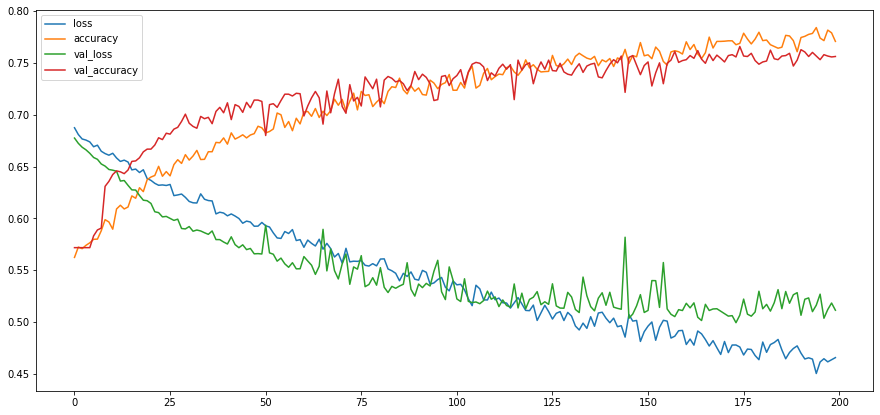

In [35]:
# sns.set_style('whitegrid')
pd.DataFrame(model.history.history).plot(figsize=(15,7))
plt.show()

In [36]:
#submit
prediction = model.predict(NPad_Tw_test) 
results = [1 if pred_ >= 0.5 else 0 for pred_ in prediction]
df = pd.DataFrame()
df['id'] = test_['id']
df['target'] = results
df.to_csv('FS_deep_new.csv')